[View in Colaboratory](https://colab.research.google.com/github/ninjakx/visualisation-visdom/blob/master/Copy_of_Temporal_CNN.ipynb)

# **TO RUN  VISDOM ON GOOGLE COLAB FOLLOW THESE STEPS:**

# Install Localtunnel

In [4]:
! npm install -g localtunnel

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/client
+ localtunnel@1.9.1
updated 1 package in 0.971s


   ╭─────────────────────────────────────╮
   │                                     │
   │   Update available 5.7.1 → 6.4.1    │
   │     Run npm i -g npm to update      │
   │                                     │
   ╰─────────────────────────────────────╯



# **Install and Start Visdom Server**

In [0]:
get_ipython().system_raw('/usr/bin/python2 -m pip install visdom')
get_ipython().system_raw('/usr/bin/python2 -m visdom.server -port 6001 >> visdomlog.txt 2>&1 &')
get_ipython().system_raw('lt --port 6001 >> url.txt 2>&1 &')


# **Check the Status of Application**

In [24]:
! cat visdomlog.txt

INFO:root:Application Started


# **Visit the contents of url.txt using http rather than https **

In [25]:
! cat url.txt

your url is: https://tidy-mule-48.localtunnel.me


## **INSTALL DEPENDENCIES**

In [0]:
!pip install visdom
!pip install torch
!pip install torchnet

##   **UTILITY FUNCTION**

(taken from the net)

In [0]:
import visdom
import time
import numpy as np

class Visualizer(object):
    '''
    orginal visdom API - self.vis.function
    '''

    def __init__(self, env='main', **kwargs):
        self.vis = visdom.Visdom(port='6001')
        
        # save（’loss',23）
        self.index = {} 
        self.log_text = ''
    
    def check_connection(self):
        return self.vis.check_connection()

    def plot(self, name, value,step=1,**kwargs):
        '''
        self.plot('loss',1.00)
        '''
        x = self.index.get(name, 0)
        self.vis.line(Y=np.array([value]), X=np.array([x]),
                      win=name,
                      opts=dict(title=name),
                      update=None if x == 0 else 'append',
                      **kwargs
                      )
        self.index[name] = x + step
        
    def plot_all(self, dict, step=1):
        '''
        plot multiple graphs
        @params d: dict (name,value) i.e. ('loss',0.11)
        '''
        for k, v in dict.items():
            self.plot(k, v, step)
            
    def plot_combine(self, name, d, step=1):
        #multiple plots in one single graph
        x = self.index.get(name, 0)
        X = []
        Y = []
        legend = []
        for k, v in sorted(d.items()):
            Y.append(v)
            X.append(x)
            legend.append(k)
        Y = np.array([Y])
        X = np.array([X])
        self.vis.line(
            Y=Y, 
            X=X,
            win=name,
            opts=dict(
                title=name,
                legend=legend
            ),
            update=None if x == 0 else 'append',
        )
        self.index[name] = x + step

    def img(self, name, img_,**kwargs):
        '''
        self.img('input_img',t.Tensor(64,64))
        self.img('input_imgs',t.Tensor(3,64,64))
        self.img('input_imgs',t.Tensor(100,1,64,64))
        self.img('input_imgs',t.Tensor(100,3,64,64),nrow=10)
        ！！！don‘t ~~self.img('input_imgs',t.Tensor(100,64,64),nrow=10)~~！！！
        '''
        self.vis.images(img_.cpu().numpy(),
                       win=name,
                       opts=dict(title=name),
                       **kwargs
                       )
                       

    def plot_combine1(self,name,d,step=1):
        #multiple plots in one single graph
        x = self.index.get(name, 0)
        X = []
        Y = []
        legend = []
        for k, v in sorted(d.items()):

            Y.append(v[0])
            X.append(v[1])
            legend.append(k)
        Y = np.array([Y])
        X = np.array([X])

        self.vis.line(
            Y=Y, 
            X=X,
            win=name,
            #env= 'main',
            opts=dict(
                title=name,
                legend=legend
            ),
            update=None if x == 0 else 'append',
        )
        self.index[name] = x + step
        


        
        
    def img_all(self, d):
        for k, v in d.iteritems():
            self.img(k, v)


    def log(self,info,name='log'):
        '''
        self.log({'loss':1,'lr':0.0001})
        '''

        self.log_text += ('[{time}] {info} <br>'.format(
                            time=time.strftime('%m%d_%H%M%S'),\
                            info=info)) 
        self.vis.text(self.log_text,name)   

    def __getattr__(self, name):
        return getattr(self.vis, name)
      

In [0]:
vis = Visualizer()

In [0]:
!pip install Pillow==4.0.0
!pip install PIL
!pip install image

## ** PLOT IMAGE**

In [162]:
img = np.random.rand(3, 512, 256)
vis.images(img, win="IMG", opts=dict(title="IMAGE"))

'IMG'

***OUTPUT***

![Img](https://raw.githubusercontent.com/ninjakx/visualisation-visdom/master/Images/Img.PNG)

## **PLOT CUSTOM LINES**

In [32]:
  X = [[] for i in range(7)]
  Y = [[] for i in range(7)]
  trace=[]
  colors = ["red","blue","yellow","green","orange","violet","brown"]
  symbols = [5, 1, 31, 104, 126, 21, 27]
  m=[1,2,3,4,5,6,7]
  n =[8,9,10,11,12,13,14]
  
  c = -1
  for j in range(7):
      c=c+1
      X[j].append(m[c])
      Y[j].append(n[c])
      tr = dict(x=X[j], y=Y[j], marker={'color': colors[j], 'symbol': symbols[j], 'size': "10"},
                          mode="markers+lines",
                         name='class-'+str(j), type="custom")
      trace.append(tr)
  layout=dict(title="XY---Curve", xaxis={'title':'X'}, yaxis={'title':'Y'})

  vis._send({'data': trace, 'layout': layout, 'win': 'XYCURVE','update':'append'})


'XYCURVE'

***OUTPUT***

<img src="https://github.com/ninjakx/visualisation-visdom/raw/master/Images/trace_loop.PNG" width="400" height="400">


## **PLOT CUSTOM LINES**

In [33]:
  trace1 = dict(x=[1,3,5,7], y=[1,3,5,7], marker={'color': 'red', 'symbol': 5, 'size': "10"},
                          mode="markers+lines",
                         name='class-1', type="custom")
  
  trace2 = dict(x=[2,4,6,8], y=[2,3,4,5], marker={'color': 'blue', 'symbol': 1, 'size': "10"},
                          mode="markers+lines", 
                         name='class-2', type="custom")
  
  trace3 = dict(x=[1,2,3,4], y=[4,3,2,1], marker={'color': 'green', 'symbol': 31, 'size': "10"},
                          mode="markers+lines", 
                         name='class-3', type="custom")
  
  trace4 = dict(x=[5,3,2,1], y=[1,2,3,6], marker={'color': 'orange', 'symbol': 104, 'size': "10"},
                          mode="markers+lines",
                         name='class-4', type="custom")
  
  trace5 = dict(x=[3,6,9,10], y=[3,2,1,0], marker={'color': 'violet', 'symbol': 126, 'size': "10"},
                          mode="markers+lines",
                         name='class-5', type="custom")
  
  trace6 = dict(x=[1,2,3,4], y=[1,4,7,8], marker={'color': 'brown', 'symbol': 21, 'size': "10"},
                          mode="markers+lines",
                         name='class-6', type="custom")
  
  trace7 = dict(x=[1,2,6,8], y=[1,4,3,7], marker={'color': 'yellow', 'symbol': 27, 'size': "10"},
                          mode="markers+lines",
                         name='class-7', type="custom")

  layout=dict(title="XY---Curve", xaxis={'title':'X'}, yaxis={'title':'Y'})

vis._send({'data': [trace1, trace2, trace3, trace4, trace5, trace6, trace7], 'layout': layout, 'win': 'XYCURVE','update':'append'})

'XYCURVE'

***OUTPUT***

<img src="https://github.com/ninjakx/visualisation-visdom/raw/master/Images/line_trace.PNG" width="400" height="400">



## **LINE WITHOUT CUSTOM SETTING**

In [0]:
vis_line = vis.line(X = np.array([1,2,3]), Y = np.array([[1,1,1],[2,2,4],[3,4,7]]), win="my_line")
#vis.updateTrace(X = np.array([[4,4,4]]), Y = np.array([[5, 6, 7]]), win="mywin")

**OUTPUT**

![Line](https://github.com/ninjakx/visualisation-visdom/raw/master/Images/my_line.PNG)


## **COMBINED PLOT**

In [0]:
def plot_combine(name,d):
        #index = {}
        #multiple plots in one single graph
        X = []
        Y = []
        legend = []
        for k, v in sorted(d.items()):
            Y.append(v[0])
            X.append(v[1])
            legend.append(k)
        Y = np.array([Y])
        X = np.array([X])

        vis.line(
            Y=Y, 
            X=X,
            win=name,
            env= 'main',
            opts=dict(
                title=name,
                legend=legend
            ),
            update= 'append',
        )
        


In [0]:
for i in [1,2,3,4,5,6]:
  d = {'class-1': [i+1,i*3] ,'class-2': [i*4,i+2]}
  plot_combine("combined_Lines",d)  

***OUTPUT*** 

<img src="https://github.com/ninjakx/visualisation-visdom/raw/master/Images/combined_lines.PNG" width="400" height="400">


## **CUSTOM COMBINED PLOT**

In [0]:
def combined_plot():
  x = [0,1,2,3,4]
  data = [{
                'x': x,
                'y': list(map(lambda i: i, x)),
                'marker':{
                        'color': 'red',
                        'symbol': 104,
                        'size': "10"},
                'mode':"markers+lines",
                
                'name':'class-1',
                'type':'line',
},{
                'x': x,
                'y': list(map(lambda i: i*2, x)),
                'marker':{
                        'color': 'green',
                        'symbol': 104,
                        'size': "10"},
                'mode':"markers+lines",
                'name':'class-2',
                'type':'line',
  },
{
                'x': x,
                'y': list(map(lambda i: i*3, x)),
                'marker':{
                        'color': 'blue',
                        'symbol': 104,
                        'size': "10"},
                'mode':"markers+lines",
                'name':'class-3',
                'type':'line',
  }
     ,
  {
                'x': x,
                'y': list(map(lambda i: i*4, x)),
                'marker':{
                        'color': 'green',
                        'symbol': 104,
                        'size': "10"},
                'mode':"markers+lines",
                'name':'class-3',
                'type':'line',
  }
  
  ]

  win = 'custom_multiple_lines'
  env = 'main'

  layout= {
                'title':"combined_plot",
                'xaxis':{'title':'x1'},
                'yaxis':{'title':'x2'}
  }
  opts = {}

  vis._send({'data': data, 'win': win, 'eid': env, 'layout': layout, 'opts': opts})
  

In [0]:
combined_plot()

***OUTPUT***

<img src="https://github.com/ninjakx/visualisation-visdom/raw/master/Images/combined_plot_custom.PNG" width="400" height="400">


In [56]:
data = [{
                'x':[7,8,9],
                'y':[4,5,6],
                'marker':{
                        'color': 'red',
                        'symbol': 104,
                        'size': "10"},
                'mode':"markers+lines",
                'text':["one","two","three"],
                'name':'1st Trace',
                'type':'line',
                'update':'append',
},{
                'x': [11,12,13],
                'y': [4,5,6],
                'type': 'scatter',
                'mode': 'markers',
                'update':'append',
}]

win = 'plot'
env = 'main'

layout= {
                'title':"combined_plot",
                'xaxis':{'title':'x1'},
                'yaxis':{'title':'x2'}
}
opts = {}

vis._send({'data': data, 'win': win, 'eid': env, 'layout': layout, 'opts': opts})


'plot'

## **MATPLOTLIB PLOT**

'window_36980d25a1a792'

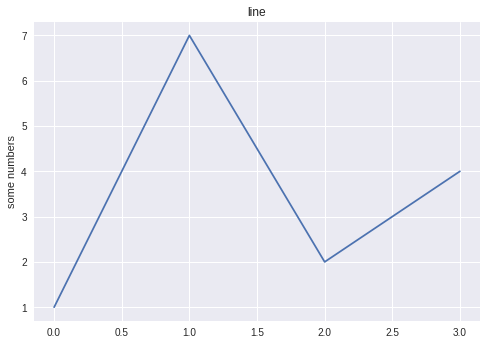

In [165]:
import matplotlib.pyplot as plt
plt.plot([1, 7, 2, 4])
plt.title("line")
plt.ylabel('some numbers')
vis.matplot(plt)

## **PLOT MULTIPLE IMAGES**

In [178]:
  imgs =  np.random.random((4, 3, 128, 128))*255
  vis.images(
        imgs,
        opts=dict(title='Random Images', caption='How random.')
    )

'window_369812249490e4'

***OUTPUT***

![Imgs](https://github.com/ninjakx/visualisation-visdom/raw/master/Images/imgs.PNG)


## **PLOT PIE CHART **

In [187]:

# pie chart
X = np.asarray([10, 22, 13, 52])
vis.pie(
        X=X,
        opts=dict(legend=['A','B','C','D'])
    )

'window_369813fa98b386'

***OUTPUT***

![Pie Chart](https://github.com/ninjakx/visualisation-visdom/raw/master/Images/pie_chart.PNG)


## **PLOT SCATTER PLOT**

In [186]:
# 2D scatterplot with custom intensities (red channel)
vis.scatter(
        X=np.random.rand(255, 2),
        Y=(np.random.rand(255) + 1.5).astype(int),
        opts=dict(
            markersize=10,
            markercolor=np.random.randint(0, 255, (2, 3,)),
        ),
    )

'window_36981367f8dc72'

***OUTPUT***

![Scatter Plots](https://github.com/ninjakx/visualisation-visdom/raw/master/Images/2D_scatter_plot.PNG)


## **PLOT HEATMAPS**

**WITH LOWER DIAGONAL AS CORRECTLY CLASSIFIED CLASSES**

In [19]:
import torchnet as tnt
import torch 
confusion_matrix = tnt.meter.ConfusionMeter(3) #I have 2 classes here
y_actu = np.array([2, 2, 1, 2, 0, 2, 1])
y_pred = np.array([2, 2, 1, 2, 0, 2, 1])
confusion_matrix.add((torch.from_numpy(y_actu)),(torch.from_numpy(y_pred)))
print(confusion_matrix.value)

<bound method ConfusionMeter.value of <torchnet.meter.confusionmeter.ConfusionMeter object at 0x7f22997587f0>>


In [20]:
vis.heatmap(
        X=confusion_matrix.value(),
        opts=dict(
            columnnames=['a', 'b', 'c'],
            rownames=['a', 'b', 'c'],
            colormap='Electric',
        )
    )

'window_3698a8b71e8c94'

***OUTPUT***

<img src="https://github.com/ninjakx/visualisation-visdom/raw/master/Images/heatmap.png" width="300" height="300">


***WITH UPPER DIAGONAL AS CORRECTLY CLASSIFIED CLASSES***

In [57]:
vis.heatmap(
        X=np.flipud(confusion_matrix.value()),
        opts=dict(
            columnnames=['a', 'b', 'c'],
            rownames=['c', 'b', 'a'],
            colormap='Electric',
        )
    )

'window_3698b84a2230f4'

***OUTPUT***

<img src="https://github.com/ninjakx/visualisation-visdom/raw/master/Images/flip_heatmap.PNG" width="300" height="300">
